In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [3]:
zacharegas21_cosmo_redmagic = {
    
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'Omega_b': 0.0486,
    'Omega_cdm': 0.341-0.0486,
    'h':  0.6737,
    'tau_reio': 0.0543,
    'sigma8': 0.735,
    'n_s':  0.9649,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}


#Here is the bestfit (theta, gammat) from Georgios, for bin 1/3 with bestfit parameters: 
#log10(Mmin)=11.97, log10(M1)=13.51, sigma_logM=0.26, alpha=1.88, fcen=0.12, log10(Mstar)=11.18, csat/cdm=1.09, m=-3.63e-2, Delta z_l=0.00, Delta z_s=1.07e-3 

In [115]:
M = Class()
M.set(zacharegas21_cosmo_redmagic)
M.set({
'output':'gamma_gal_gallens_1h,gamma_gal_gallens_2h',
'ell_max' : 5e5,
'ell_min' : 2,
'dlogell':0.07,
'mass function':'T08M200c',
'M_min':1e9,
'M_max':1e+17,
'z_min':1e-5,
'z_max': 4.,
'delta for galaxies':'200c',
'delta for matter density':'200c',
'concentration parameter':'B13',
'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
'sigma_log10M_HOD':0.26,
'alpha_s_HOD':1.88,
'x_out_truncated_nfw_profile_satellite_galaxies':1.09,
'f_cen_HOD': 0.12,
'Delta_z_lens':0.00,
'Delta_z_source':1.07e-3,
'galaxy_sample' : 'custom',
'full_path_to_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
'N_samp_fftw':1000, #precision parameter for the bessel transform to theta space
'l_min_samp_fftw' : 1e-12,
'l_max_samp_fftw' : 1e12
})
M.compute()

In [116]:
gamma_t_thetas = np.asarray(M.gamma_ggamma()['thetas'])
gamma_t_1h = np.asarray(M.gamma_ggamma()['1h'])
gamma_t_2h = np.asarray(M.gamma_ggamma()['2h'])

cl_g_gamma_ell = np.asarray(M.cl_ggamma()['ell'])
cl_g_gamma_1h = np.asarray(M.cl_ggamma()['1h'])
cl_g_gamma_2h = np.asarray(M.cl_ggamma()['2h'])
m_gammat = -3.63e-2

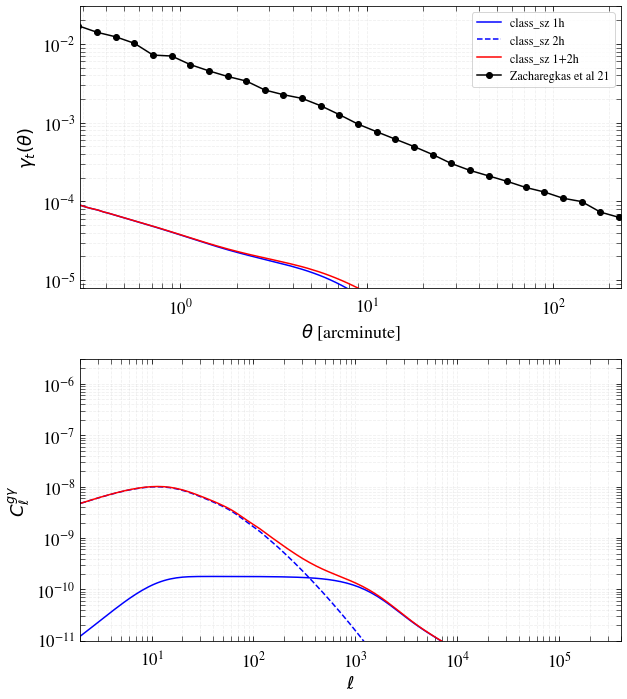

In [117]:

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(9,10))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r'$\theta$ [arcminute]',size=title_size)
ax.set_ylabel(r'$\gamma_t(\theta)$',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(8e-6,3e-2)
ax.set_xlim(2.9e-1,2.3e2)
ax.plot(gamma_t_thetas,(1.+m_gammat)*gamma_t_1h,label='class_sz 1h',c='b',ls='-')
ax.plot(gamma_t_thetas,(1.+m_gammat)*gamma_t_2h,label='class_sz 2h',c='b',ls='--')
ax.plot(gamma_t_thetas,(1.+m_gammat)*(gamma_t_2h+gamma_t_1h),label='class_sz 1+2h',c='r')
th_z21, gammat_z21 = np.loadtxt('/Users/boris/Work/DES/gammat_1_3.txt',unpack=True)
ax.plot(th_z21,gammat_z21,label='Zacharegkas et al 21',marker='o',c='k')
ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$C_\ell^{g\gamma}$',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-11,3e-6)
ax.set_xlim(2.,4e5)
fac = cl_g_gamma_ell*(cl_g_gamma_ell+1.)/2./np.pi
ax.plot(cl_g_gamma_ell,cl_g_gamma_1h/fac,label='class_sz 1h',c='b',ls='-')
ax.plot(cl_g_gamma_ell,cl_g_gamma_2h/fac,label='class_sz 2h',c='b',ls='--')
ax.plot(cl_g_gamma_ell,cl_g_gamma_1h/fac+cl_g_gamma_2h/fac,label='class_sz 1+2h',c='r')

fig.tight_layout()

#plt.savefig('redmagicy3_gammat_1_3_class_sz_cut_l10e4.pdf')

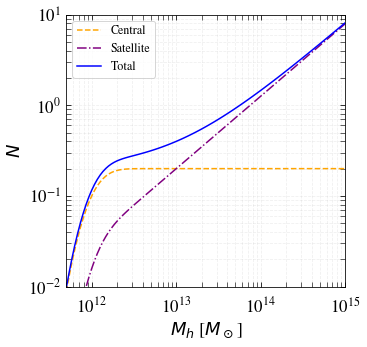

In [114]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$N$',size=title_size)
ax.set_xlabel(r'$M_h$ [$M_\odot$]',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e1)
ax.set_xlim(5e11,1e15)
M_arr = np.geomspace(5e11,1e15,100)
get_N_centrals = np.vectorize(M.get_N_centrals)
Nc = get_N_centrals(0.,M_arr,1e12,0.25,0.2)
get_N_sats = np.vectorize(M.get_N_satellites)
Ns = get_N_sats(0.,M_arr,Nc,0.,0.8,1e13)
ax.plot(M_arr,Nc,ls='--',c='orange',label='Central')
ax.plot(M_arr,Ns,ls='-.',c='purple',label='Satellite')
ax.plot(M_arr,Ns+Nc,ls='-',c='b',label='Total')
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')

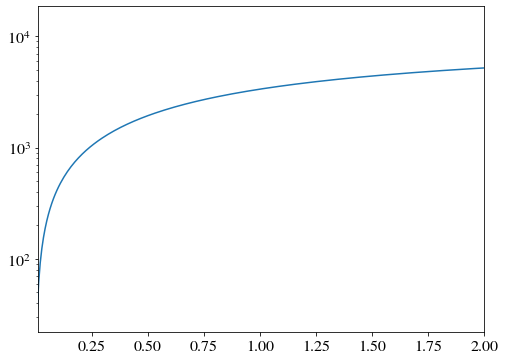

In [101]:
plt.plot(M.get_background()['z'],M.get_background()['ang.diam.dist.']*(1.+M.get_background()['z']))
plt.xlim(1e-2,2e0)
# plt.ylim(1e-2,2e0)
plt.yscale('log')

In [108]:
zp = 0.3 
lp =5e5
k = lp/(M.angular_distance(zp)*(1.+zp))
"%.5e"%(1./k)

'2.45946e-03'

In [109]:
(M.angular_distance(zp)*(1.+zp))

1229.732463340549